<a href="https://colab.research.google.com/github/Ciro125/Alura/blob/main/Deep_Learning_Parte_1_Keras_(classifica%C3%A7%C3%A3o_roupas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras 

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Text(0.5, 1.0, '9')

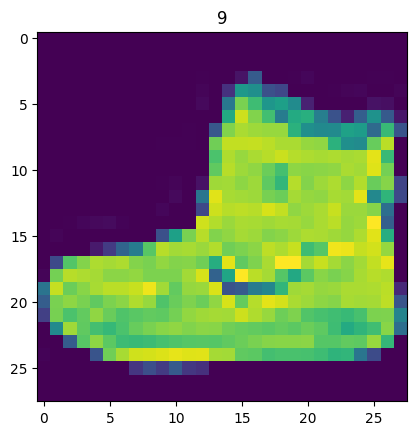

In [3]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

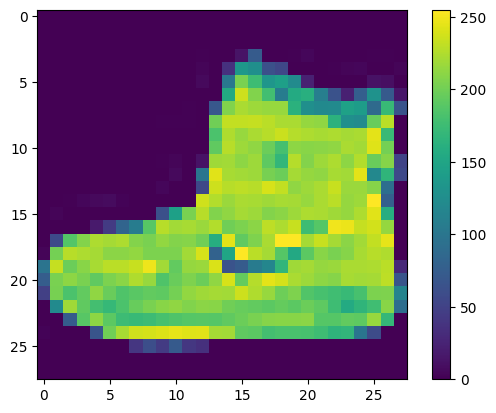

In [4]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [5]:
print(identificacoes_treino.min())
print(identificacoes_treino.max())

total_de_classificacoes = 10

0
9


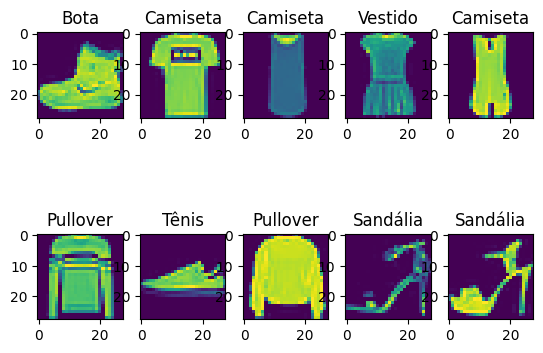

In [6]:
nomes_de_classificacoes = ["Camiseta", "Calça", "Pullover", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

for imagem in range (10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [7]:
# Normalização
imagens_treino = imagens_treino/float(255)

In [8]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = "adam",
               loss = "sparse_categorical_crossentropy")

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 24s 12ms/step - loss: 0.4815


In [9]:
#Segundo Modelo
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dense(128, activation = tensorflow.nn.relu),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = "adam",
               loss = "sparse_categorical_crossentropy")

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.4747


In [10]:
#Terceiro Modelo
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dense(128, activation = tensorflow.nn.relu),
  keras.layers.Dense(64, activation = tensorflow.nn.relu),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = "adam",
               loss = "sparse_categorical_crossentropy")

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.4856


In [19]:
#Segundo Modelo Com métrica
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dense(128, activation = tensorflow.nn.relu),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = "adam",
               loss = "sparse_categorical_crossentropy",
               metrics=["accuracy"])

historico = modelo.fit(imagens_treino, identificacoes_treino,epochs=5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4939 - accuracy: 0.8221 - val_loss: 0.4268 - val_accuracy: 0.8427
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3686 - accuracy: 0.8641 - val_loss: 0.3696 - val_accuracy: 0.8669
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3309 - accuracy: 0.8777 - val_loss: 0.3506 - val_accuracy: 0.8751
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3081 - accuracy: 0.8875 - val_loss: 0.3303 - val_accuracy: 0.8772
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2902 - accuracy: 0.8912 - val_loss: 0.3536 - val_accuracy: 0.8666


In [22]:
historico.history

{'loss': [0.49386918544769287,
  0.36860325932502747,
  0.3308897018432617,
  0.30810195207595825,
  0.29018333554267883],
 'accuracy': [0.8220624923706055,
  0.864104151725769,
  0.8776875138282776,
  0.887499988079071,
  0.8912291526794434],
 'val_loss': [0.42678043246269226,
  0.3695508539676666,
  0.3506464958190918,
  0.33026745915412903,
  0.35355836153030396],
 'val_accuracy': [0.8426666855812073,
  0.8669166564941406,
  0.875083327293396,
  0.8771666884422302,
  0.8665833473205566]}

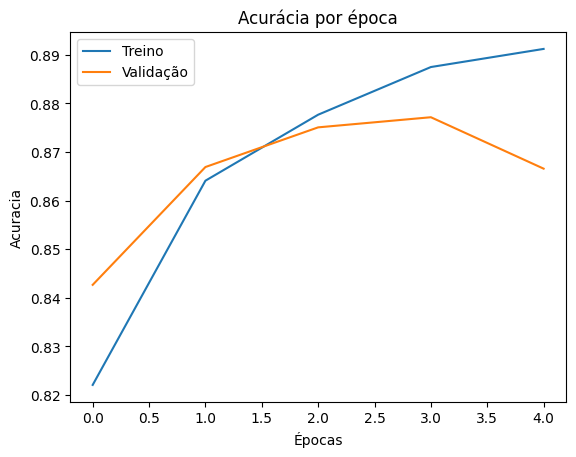

In [26]:
plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.title("Acurácia por época")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["Treino", "Validação"])

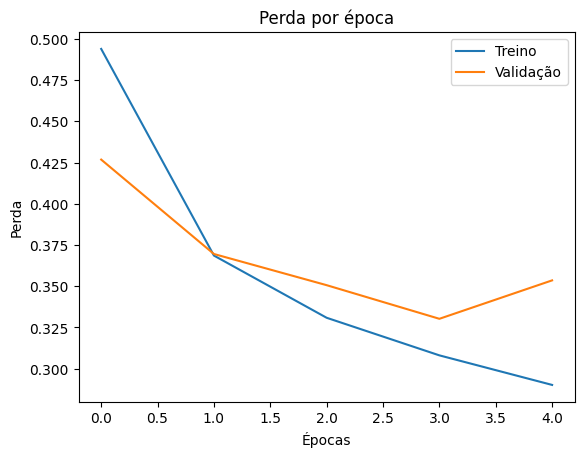

In [27]:
plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.title("Perda por época")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["Treino", "Validação"])

In [17]:
testes = modelo.predict(imagens_teste, max_queue_size=10000)
print("Resultado teste:", np.argmax(testes[1]))
print("Número da imagem de teste:", identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
Resultado teste: 2
Número da imagem de teste: 2


In [18]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print("Perda do teste:", perda_teste)
print("Acuracia do teste:", acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 54.1478 - accuracy: 0.8565
Perda do teste: 54.147789001464844
Acuracia do teste: 0.8565000295639038


In [28]:
#Modelo Com métrica com 10 épocas
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dense(128, activation = tensorflow.nn.relu),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = "adam",
               loss = "sparse_categorical_crossentropy",
               metrics=["accuracy"])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4941 - accuracy: 0.8222 - val_loss: 0.4732 - val_accuracy: 0.8302
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3694 - accuracy: 0.8658 - val_loss: 0.3648 - val_accuracy: 0.8665
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3346 - accuracy: 0.8763 - val_loss: 0.3460 - val_accuracy: 0.8750
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3053 - accuracy: 0.8864 - val_loss: 0.3317 - val_accuracy: 0.8808
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2872 - accuracy: 0.8930 - val_loss: 0.3233 - val_accuracy: 0.8835
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2703 - accuracy: 0.8992 - val_loss: 0.3176 - val_accuracy: 0.8847
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2591 - accuracy: 0.9015 - val_loss: 0.3159 - val_a

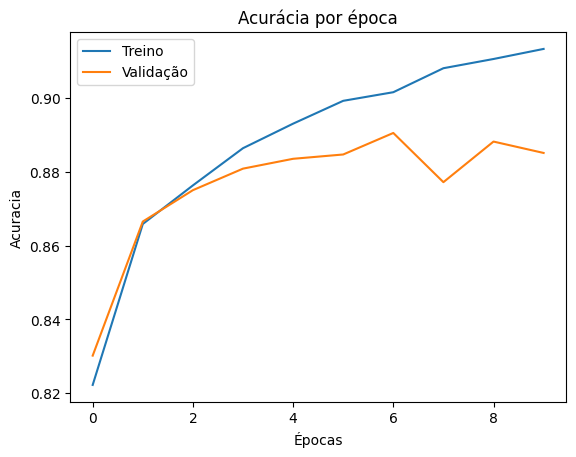

In [29]:
plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.title("Acurácia por época")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["Treino", "Validação"])

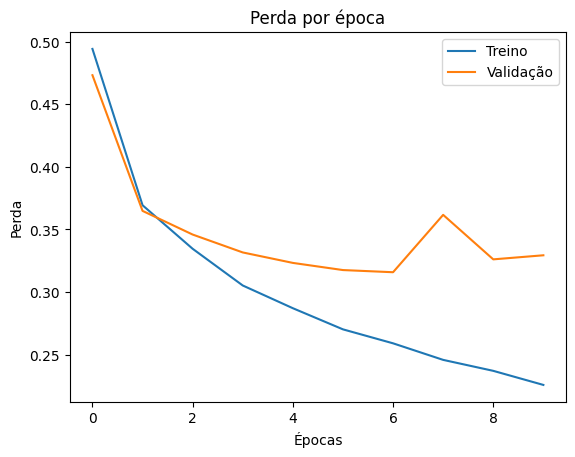

In [30]:
plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.title("Perda por época")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["Treino", "Validação"])

In [31]:
#Modelo Com métrica com 5 épocas e Dropout
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(128, activation = tensorflow.nn.relu),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = "adam",
               loss = "sparse_categorical_crossentropy",
               metrics=["accuracy"])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5311 - accuracy: 0.8055 - val_loss: 0.4018 - val_accuracy: 0.8497
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3991 - accuracy: 0.8531 - val_loss: 0.3810 - val_accuracy: 0.8596
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3677 - accuracy: 0.8650 - val_loss: 0.3756 - val_accuracy: 0.8659
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3448 - accuracy: 0.8727 - val_loss: 0.3347 - val_accuracy: 0.8789
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3267 - accuracy: 0.8798 - val_loss: 0.3567 - val_accuracy: 0.8722


In [36]:
from tensorflow.keras.models import load_model

modelo.save("modelo.h5")
modelo_salvo = load_model("modelo.h5")

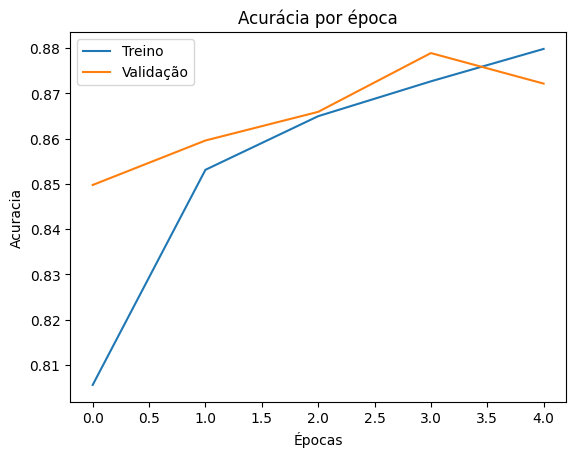

In [32]:
plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.title("Acurácia por época")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["Treino", "Validação"])

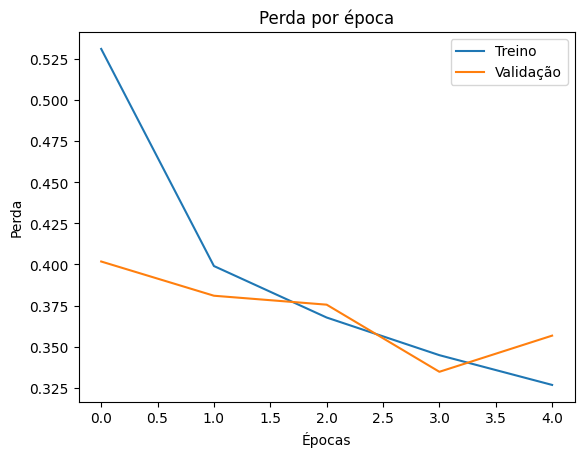

In [33]:
plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.title("Perda por época")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["Treino", "Validação"])

In [37]:
testes = modelo.predict(imagens_teste, max_queue_size=10000)
print("Resultado teste:", np.argmax(testes[1]))
print("Número da imagem de teste:", identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print("Resultado teste modelo salvo :", np.argmax(testes_modelo_salvo[1]))
print("Número da imagem de teste:", identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
Resultado teste: 2
Número da imagem de teste: 2
313/313 [==============================] - 2s 6ms/step
Resultado teste modelo salvo : 2
Número da imagem de teste: 2
